In [6]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [7]:
data = sio.loadmat('data2.mat')
DATA = data['X']

In [8]:
def cluster(DATA, NumberOfClusters):
    Centers = []
    random_row = DATA.shape[0]
    random_indices = np.random.choice(random_row, size=NumberOfClusters, replace=False)
    for k in range(NumberOfClusters):
        Centers.append(DATA[random_indices[k]].tolist())

    Centers0 = Centers

    while 1:
        New_Centers = []
        Distance = []
        for k in range(NumberOfClusters):
            Distance.append([])
        i = 0
        for cent in Centers:
            for point in DATA:
                Dis = 0
                X = (np.subtract(cent, point)) ** 2
                for d in range(len(DATA[0])):
                    Dis += X[d]
                D = np.sqrt(Dis)
                Distance[i].append(D)
            i += 1
        M = np.min(Distance, axis=0)

        lables = []
        for i in range(len(DATA)):
            for k in range(NumberOfClusters):
                if M[i] == Distance[k][i]:
                    lables.append(k)
        z = 0
        new = []
        for k in range(NumberOfClusters):
            new.append([])

        for L in lables:
            new[L].append(DATA[z])
            z += 1

        for k in range(NumberOfClusters):
            New_Centers.append(np.mean(new[k], axis=0).tolist())

        if (Centers == New_Centers):
            break
        else:
            Centers = New_Centers
            continue
    return lables, Centers ,Centers0



In [9]:
def object_function(DATA, Lables, Centers, NumberOfClusters):
    Distance = []
    W = []
    for k in range(NumberOfClusters):
        Distance.append([])
        i = 0
    for L in Lables:
        Dis = 0
        X = (np.subtract(Centers[L], DATA[i])) ** 2
        for d in range(len(DATA[0])):
            Dis += X[d]
        D = np.sqrt(Dis)
        Distance[L].append(D)
        i+=1
    for k in range(NumberOfClusters):
        sum = 0
        for i in range(len(Distance[k])):
            sum += Distance[k][i]
        W.append(sum)

    Total_W = 0
    for k in range(NumberOfClusters):
        Total_W += W[k]

    return Total_W


0
1
2
3
4
5
6
7
8
9
10 time for 5 cluster =  0:06:14.258441


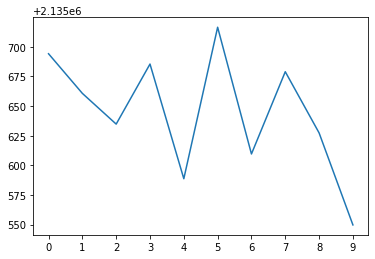

In [10]:
W_T = []
cent=[]
a = datetime.datetime.now()
for i in range(10):
    print(i)
    Lables, Centers , Centers0= cluster(DATA, 5)
    Total_W = object_function(DATA, Lables, Centers, 5)
    W_T.append(Total_W)
    cent.append(Centers)
b = datetime.datetime.now()
c = b - a
print(f'10 time for 5 cluster =  {c}')


plt.plot(range(10),W_T)
plt.xticks(range(10))
plt.show()

0
1
2
3
4
time 10 =  0:10:37.458512


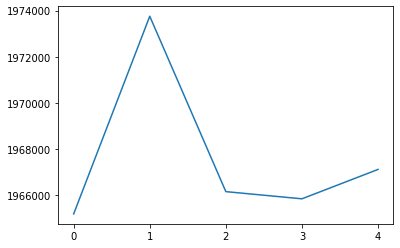

In [11]:
W_T = []
cent=[]
a = datetime.datetime.now()
for i in range(5):
    print(i)
    Lables, Centers , Centers0= cluster(DATA, 10)
    Total_W = object_function(DATA, Lables, Centers, 10)
    W_T.append(Total_W)
    cent.append(Centers)
b = datetime.datetime.now()
c = b - a
print(f'time 10 =  {c}')

# print(W_T)
# print(len(W_T))
plt.plot(range(5),W_T)
plt.xticks(range(0,5,1))
plt.show()


0
1
2
3
4
time 16 =  0:20:53.593679


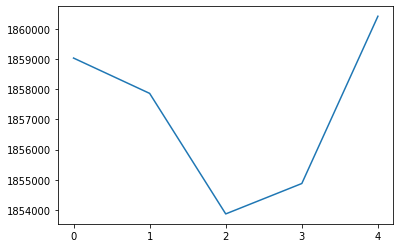

In [12]:
W_T2 = []
cent2=[]
a = datetime.datetime.now()
for i in (range(5)):
    print(i)
    Lables, Centers , Centers0 = cluster(DATA, 16)
    Total_W = object_function(DATA, Lables, Centers, 16)
    W_T2.append(Total_W)
    cent2.append(Centers[i])
b = datetime.datetime.now()
c = b - a
print(f'time 16 =  {c}')


plt.plot(range(5),W_T2)
plt.xticks(range(0,5,1))
plt.show()


In [ ]:
k = [1,5,10,15,16]
W_T3 = []
for NumberOfClusters in k:
    a = datetime.datetime.now()
    Lables, Centers = cluster(DATA, 1)
    Total_W = object_function(DATA, Lables, Centers, NumberOfClusters)
    W_T3.append(Total_W)
    b = datetime.datetime.now()
    c = b - a
    print(f'time {NumberOfClusters} =  {c}')
    print(W_T3)

plt.plot(k, W_T3)
plt.xticks(k)
plt.grid()
plt.show()